In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# read out_LED.csv as dataframe
og_df = pd.read_csv('../out_LED.csv')

# chose non repeat trials - 0 or 2 or missing
df = og_df[ og_df['repeat_trial'].isin([0,2]) | og_df['repeat_trial'].isna() ]

# only session type 7
session_type = 7    
df = df[ df['session_type'].isin([session_type]) ]

# training level 16
training_level = 16
df = df[ df['training_level'].isin([training_level]) ]

In [3]:
df = df[ df['LED_trial'] == 0]

In [4]:
df.loc[:, 'rt_wrt_stim'] = df['timed_fix'] - df['intended_fix']

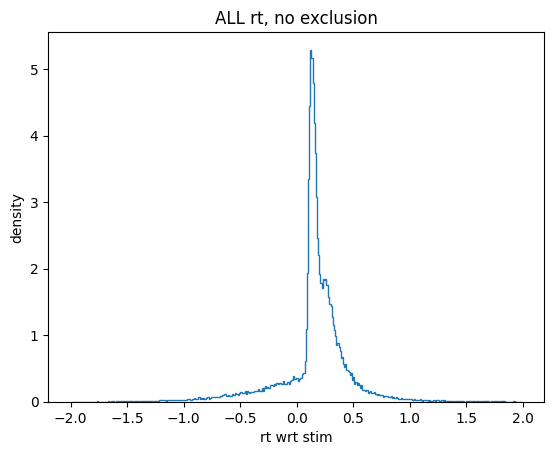

In [5]:
# all RT, no exclusion
bins = np.arange(-2,2,0.01)
plt.hist(df['rt_wrt_stim'], bins=bins, label='all RT', density=True, histtype='step')
plt.xlabel('rt wrt stim')
plt.ylabel('density')
plt.title('ALL rt, no exclusion');

In [6]:
# remove truncated aborts
# - remove abort_event == 3 and timed_fix < 0.3
df_trunc_aborts = df[ ~((df['abort_event'] == 3) & (df['timed_fix'] < 0.3)) ]

In [7]:
# remove all timed_fix < 0.3
df_trunc_all = df[ df['timed_fix'] >= 0.3 ]
df_trunc_all_rt_wrt_stim = df_trunc_all['rt_wrt_stim']


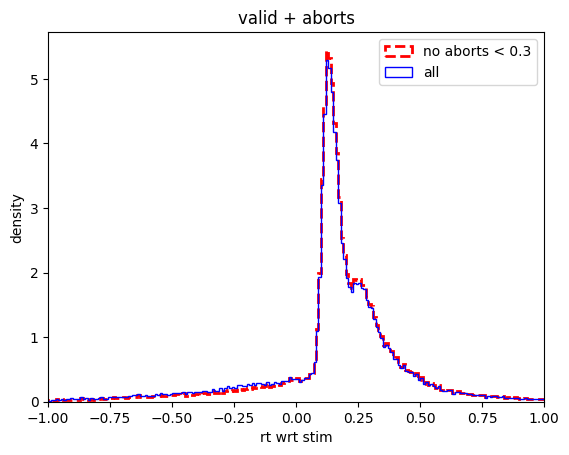

In [9]:
bins = np.arange(-2,2,0.01)
df_trunc_aborts_rt_wrt_stim = df_trunc_aborts['rt_wrt_stim']
plt.hist(df_trunc_aborts_rt_wrt_stim, bins=bins, density=True, histtype='step', color='r', label='no aborts < 0.3', linewidth=2, linestyle='--')
plt.hist(df['rt_wrt_stim'], bins=bins, density=True, histtype='step', color='b', label='all')
plt.hist(df_trunc_all_rt_wrt_stim, bins=bins, density=True, histtype='step', color='g', label='no timed_fix(wrt fix) < 0.3')
plt.xlabel('rt wrt stim')
plt.ylabel('density')
plt.title('valid + aborts')
plt.xlim(-1,1)
plt.legend()

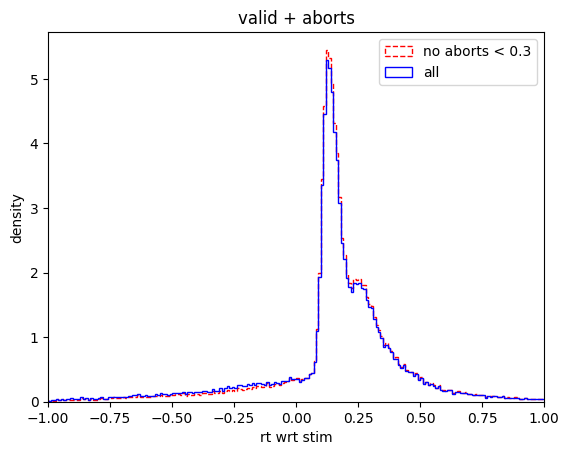

In [10]:
bins = np.arange(-2,2,0.01)
df_trunc_aborts_rt_wrt_stim = df_trunc_aborts['rt_wrt_stim']
plt.hist(df_trunc_aborts_rt_wrt_stim, bins=bins, density=True, histtype='step', color='r', label='no aborts < 0.3', linewidth=1, linestyle='--')
plt.hist(df['rt_wrt_stim'], bins=bins, density=True, histtype='step', color='b', label='all')
plt.xlabel('rt wrt stim')
plt.ylabel('density')
plt.title('valid + aborts')
plt.xlim(-1,1)
plt.legend()

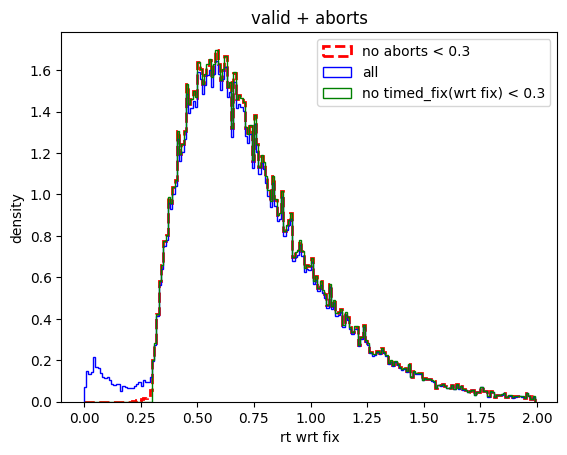

In [ ]:
bins = np.arange(0,2,0.01)
plt.hist(df_trunc_aborts['timed_fix'], bins=bins, density=True, histtype='step', color='r', label='no aborts < 0.3', linewidth=2, linestyle='--')
plt.hist(df['timed_fix'], bins=bins, density=True, histtype='step', color='b', label='all')
plt.hist(df_trunc_all['timed_fix'], bins=bins, density=True, histtype='step', color='g', label='no timed_fix(wrt fix) < 0.3')
plt.xlabel('rt wrt fix')
plt.ylabel('density')
plt.title('valid + aborts')
plt.legend()